In [11]:
import os
import numpy as np
# import the core map making code
from sodetlib.detmap.makemap import make_map_smurf, make_map_vna, make_map_g3_timestream, psat_map,\
    get_formatted_metadata
# custom packages used in this example
from sodetlib.detmap.detmap_config import get_config, abs_path_detmap

In [12]:
config = get_config(array_name='Mv6',
                    config_ymal_path=os.path.join(abs_path_detmap, 'example', 'example.yaml'),
                    output_data_dir=os.path.join(abs_path_detmap, 'output'))

In [13]:
# Get Metadata
# get the design file for the resonators
design_data, wafer_layout_data = get_formatted_metadata(north_is_highband=config['north_is_highband'],
                                                        design_file=config['design_file_path'],
                                                        waferfile=config['waferfile_path'],
                                                        layout_position_path=config['mux_pos_num_to_mux_band_num_path'],
                                                        dark_bias_lines=config['dark_bias_lines'])


Saved the OperateTuneData Diagnostic layout plot at: /Users/cwheeler/PycharmProjects/sodetlib/sodetlib/detmap/output/plots/smurf_layout.png


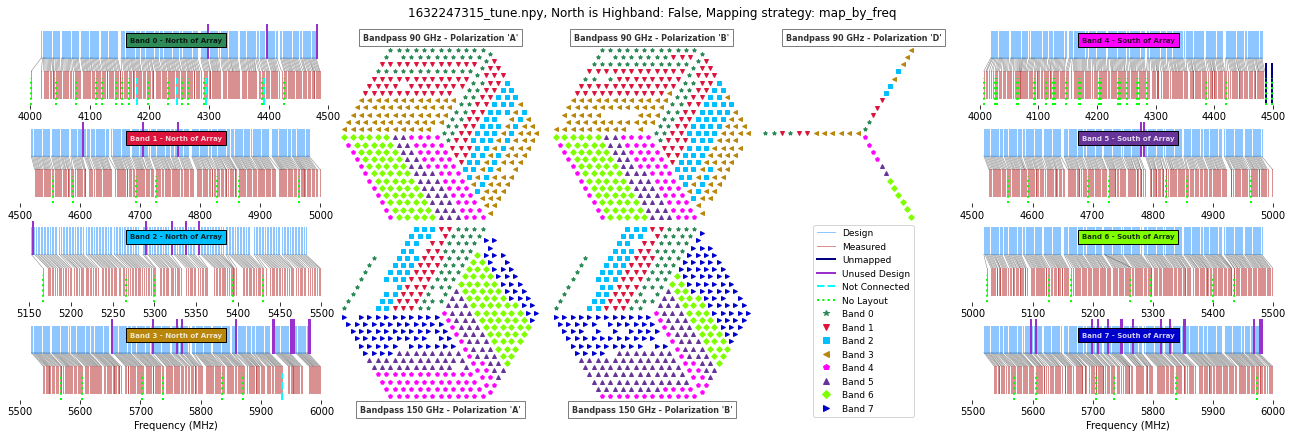

Output CSV written at: /Users/cwheeler/PycharmProjects/sodetlib/sodetlib/detmap/sample_data/smurf_pixel_freq_mapping.csv
SMuRF-band:0  Making One-to-One refit and mapping
  1 outlier(s) are more than 10.0 MHz from a design value.
SMuRF-band:1  Making One-to-One refit and mapping
  No outliers that are more than 10.0 MHz from a design value.
SMuRF-band:2  Making One-to-One refit and mapping
  No outliers that are more than 10.0 MHz from a design value.
SMuRF-band:3  Making One-to-One refit and mapping
  No outliers that are more than 10.0 MHz from a design value.
SMuRF-band:4  Making One-to-One refit and mapping
  2 outlier(s) are more than 10.0 MHz from a design value.
  right overrun: [4484.692153423016, 4495.962905555661]
   left overrun: []
  Doing overrun healing...
  Overrun healing complete.
 2 measured frequencies unmapped (more measured then design): [4484.692153423016, 4495.962905555661]
SMuRF-band:5  Making One-to-One refit and mapping
  No outliers that are more than 10.0 MH

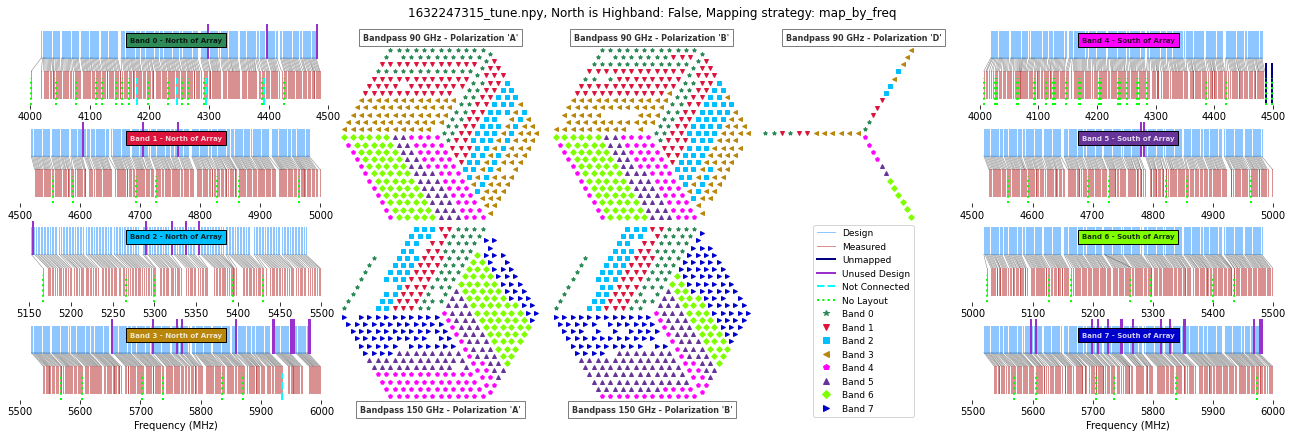

Output CSV written at: /Users/cwheeler/PycharmProjects/sodetlib/sodetlib/detmap/sample_data/smurf_pixel_freq_mapping.csv


In [14]:
# read the tunefile and initialize the data instance
tune_data_smurf = make_map_smurf(tunefile=config['tunefile'],
                                 north_is_highband=config['north_is_highband'],
                                 design_file=config['design_file_path'],
                                 waferfile=config['waferfile_path'],
                                 layout_position_path=config['mux_pos_num_to_mux_band_num_path'],
                                 dark_bias_lines=config['dark_bias_lines'],
                                 output_path_csv=config['output_filename_smurf'],
                                 layout_plot_path=config['layout_plot_filename_smurf'],
                                 do_csv_output=config['do_csv_output'],
                                 save_layout_plot=config['save_layout_plot'],
                                 show_layout_plot=config['show_layout_plot'],
                                 mapping_strategy=config['mapping_strategy'])

SMuRF-band:0  Making One-to-One refit and mapping
  No outliers that are more than 10.0 MHz from a design value.
SMuRF-band:1  Making One-to-One refit and mapping
  No outliers that are more than 10.0 MHz from a design value.
  right overrun: [4983.6910128678155]
   left overrun: [4519.1109481280455]
  Doing overrun healing...
  Overrun healing complete.
 2 measured frequencies unmapped (more measured then design): [4983.6910128678155, 4519.1109481280455]
SMuRF-band:2  Making One-to-One refit and mapping
  No outliers that are more than 10.0 MHz from a design value.
  right overrun: [5482.777535734942]
   left overrun: []
  Doing overrun healing...
  Overrun healing complete.
 1 measured frequencies unmapped (more measured then design): [5482.777535734942]
SMuRF-band:3  Making One-to-One refit and mapping
  No outliers that are more than 10.0 MHz from a design value.
  right overrun: [5979.09245553875]
   left overrun: []
  Doing overrun healing...
  Overrun healing complete.
SMuRF-ban

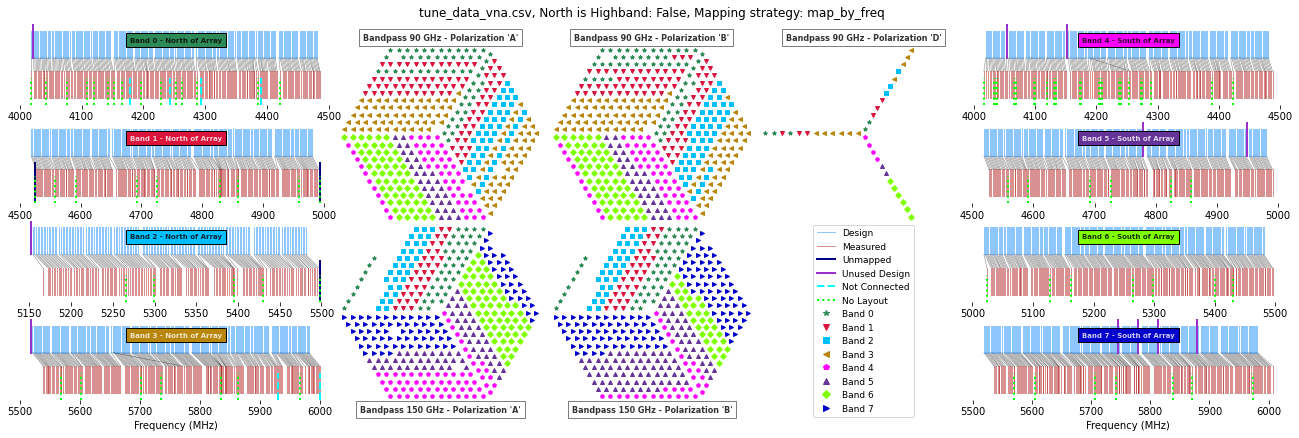

Output CSV written at: /Users/cwheeler/PycharmProjects/sodetlib/sodetlib/detmap/output/test_pixel_info_vna.csv
SMuRF-band:0  Making One-to-One refit and mapping
  No outliers that are more than 10.0 MHz from a design value.
SMuRF-band:1  Making One-to-One refit and mapping
  No outliers that are more than 10.0 MHz from a design value.
  right overrun: [4983.6910128678155]
   left overrun: [4519.1109481280455]
  Doing overrun healing...
  Overrun healing complete.
 2 measured frequencies unmapped (more measured then design): [4983.6910128678155, 4519.1109481280455]
SMuRF-band:2  Making One-to-One refit and mapping
  No outliers that are more than 10.0 MHz from a design value.
  right overrun: [5482.777535734942]
   left overrun: []
  Doing overrun healing...
  Overrun healing complete.
 1 measured frequencies unmapped (more measured then design): [5482.777535734942]
SMuRF-band:3  Making One-to-One refit and mapping
  No outliers that are more than 10.0 MHz from a design value.
  right o

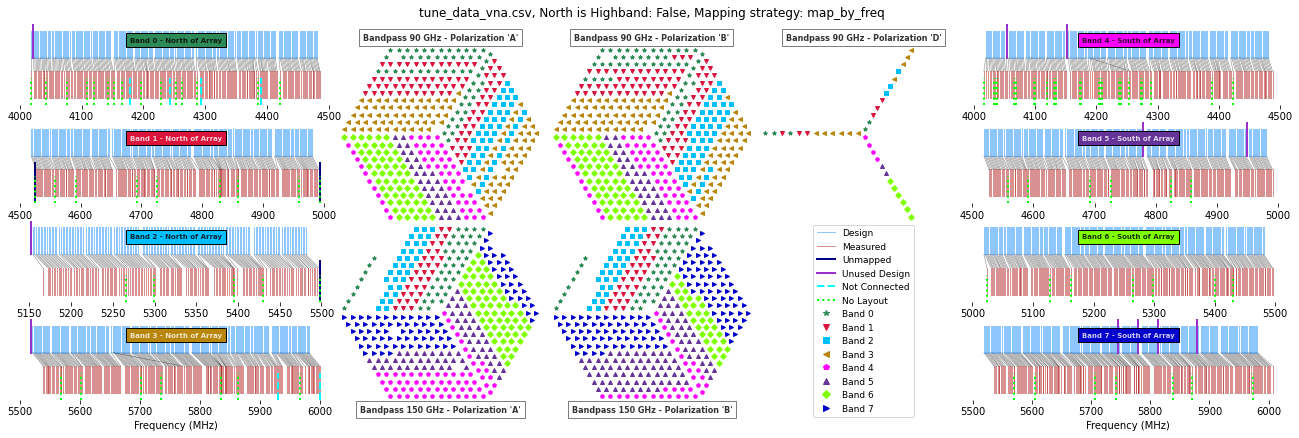

Output CSV written at: /Users/cwheeler/PycharmProjects/sodetlib/sodetlib/detmap/output/test_pixel_info_vna.csv


In [15]:
# VNA scans
tune_data_vna = make_map_vna(tune_data_vna_output_filename=config['tune_data_vna_output_filename'],
                             north_is_highband=config['north_is_highband'],
                             path_north_side_vna=config['path_north_side_vna'],
                             path_south_side_vna=config['path_south_side_vna'],
                             shift_mhz=config['vna_shift_mhz'],
                             design_file=config['design_file_path'], waferfile=config['waferfile_path'],
                             layout_position_path=config['mux_pos_num_to_mux_band_num_path'],
                             dark_bias_lines=config['dark_bias_lines'],
                             output_path_csv=config['output_filename_vna'],
                             layout_plot_path=config['layout_plot_filename_vna'],
                             do_csv_output=config['do_csv_output'],
                             save_layout_plot=config['save_layout_plot'],
                             show_layout_plot=config['show_layout_plot'],
                             mapping_strategy=config['mapping_strategy'])

SMuRF-band:0  Making One-to-One refit and mapping
  1 outlier(s) are more than 10.0 MHz from a design value.
  right overrun: [4472.543708396472, 4474.587492638572, 4476.690872521129, 4478.647291344622, 4517.139882911136]
   left overrun: []
  Doing overrun healing...
  Overrun healing complete.
SMuRF-band:1  Making One-to-One refit and mapping
  No outliers that are more than 10.0 MHz from a design value.
  right overrun: []
   left overrun: [4521.169665227339]
  Doing overrun healing...
  Overrun healing complete.
SMuRF-band:2  Making One-to-One refit and mapping
  1 outlier(s) are more than 10.0 MHz from a design value.
SMuRF-band:3  Making One-to-One refit and mapping
  No outliers that are more than 10.0 MHz from a design value.
Saved the OperateTuneData Diagnostic layout plot at: /Users/cwheeler/PycharmProjects/sodetlib/sodetlib/detmap/output/plots/g3_layout.png


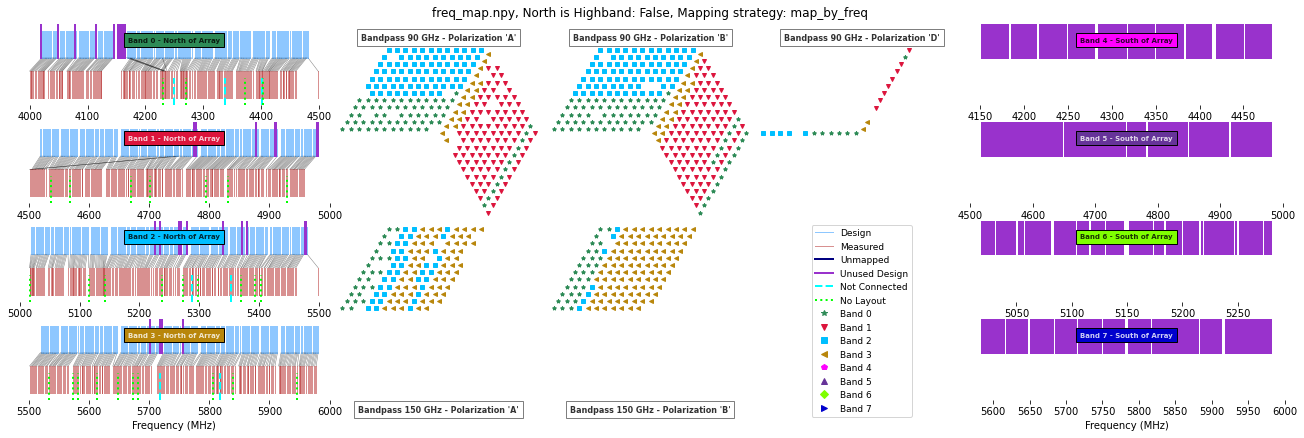

Output CSV written at: /Users/cwheeler/PycharmProjects/sodetlib/sodetlib/detmap/output/g3_pixel_freq_mapping.csv
SMuRF-band:0  Making One-to-One refit and mapping
  1 outlier(s) are more than 10.0 MHz from a design value.
  right overrun: [4472.543708396472, 4474.587492638572, 4476.690872521129, 4478.647291344622, 4517.139882911136]
   left overrun: []
  Doing overrun healing...
  Overrun healing complete.
SMuRF-band:1  Making One-to-One refit and mapping
  No outliers that are more than 10.0 MHz from a design value.
  right overrun: []
   left overrun: [4521.169665227339]
  Doing overrun healing...
  Overrun healing complete.
SMuRF-band:2  Making One-to-One refit and mapping
  1 outlier(s) are more than 10.0 MHz from a design value.
SMuRF-band:3  Making One-to-One refit and mapping
  No outliers that are more than 10.0 MHz from a design value.
Saved the OperateTuneData Diagnostic layout plot at: /Users/cwheeler/PycharmProjects/sodetlib/sodetlib/detmap/output/plots/g3_layout.png


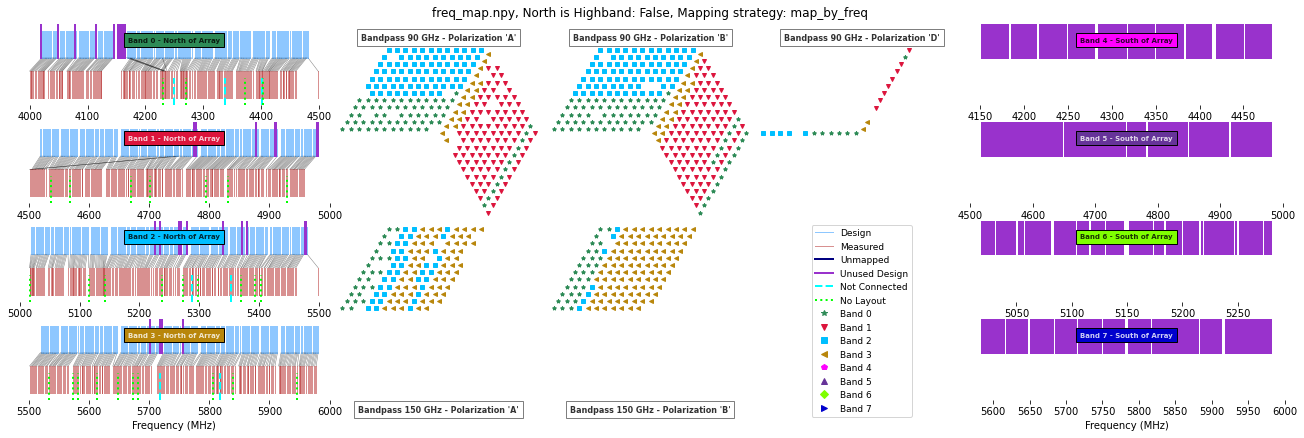

Output CSV written at: /Users/cwheeler/PycharmProjects/sodetlib/sodetlib/detmap/output/g3_pixel_freq_mapping.csv


In [16]:
config = get_config(array_name='Sv5',
                    config_ymal_path=os.path.join(abs_path_detmap, 'example', 'example.yaml'),
                    output_data_dir=os.path.join(abs_path_detmap, 'output'))
# get the design file for the resonators
design_data, wafer_layout_data = get_formatted_metadata(north_is_highband=config['north_is_highband'],
                                                        design_file=config['design_file_path'],
                                                        waferfile=config['waferfile_path'],
                                                        layout_position_path=config['mux_pos_num_to_mux_band_num_path'],
                                                        dark_bias_lines=config['dark_bias_lines'])
tune_data_g3 = make_map_g3_timestream(timestream=config['timestream'],
                                      north_is_highband=config['north_is_highband'],
                                      design_file=config['design_file_path'], waferfile=config['waferfile_path'],
                                      layout_position_path=config['mux_pos_num_to_mux_band_num_path'],
                                      dark_bias_lines=config['dark_bias_lines'],
                                      output_path_csv=config['output_filename_g3'],
                                      layout_plot_path=config['layout_plot_filename_g3'],
                                      do_csv_output=config['do_csv_output'],
                                      save_layout_plot=config['save_layout_plot'],
                                      show_layout_plot=config['show_layout_plot'],
                                      mapping_strategy=config['mapping_strategy'])

In [17]:
psat_map(tune_data=tune_data_smurf, cold_ramp_file=config['cold_ramp_file'],
         temp_k=config['psat_temp_k'], show_plot=config['psat_show_plot'], save_plot=config['psat_save_plot'])

Plot saved at: /Users/cwheeler/PycharmProjects/sodetlib/sodetlib/detmap/output/plots/90_GHz_Psat_at_100mK_CL=9.0K,_range=0.0-3.0_pW.png
Plot saved at: /Users/cwheeler/PycharmProjects/sodetlib/sodetlib/detmap/output/plots/150_GHz_Psat_at_100mK_CL=9.0K,_range=0.0-6.0_pW.png
Plot saved at: /Users/cwheeler/PycharmProjects/sodetlib/sodetlib/detmap/output/plots/90_GHz_Psat_at_100mK_CL=9.0K,_range=0.0-3.0_pW.png
Plot saved at: /Users/cwheeler/PycharmProjects/sodetlib/sodetlib/detmap/output/plots/150_GHz_Psat_at_100mK_CL=9.0K,_range=0.0-6.0_pW.png


In [18]:
# if you like to work with rectangular data topologies, it is easy to cast the data into an iterable like a list
data_list = list(tune_data_smurf)
# and then into a numpy array
data_array = np.array(data_list)